# Preventing Customer Churn

# Imports

In [1]:
# imports used for project 
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from env import get_db_url
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

import wrangle as w
import explore as e
import model as m

#alpha will equal .05 for all statistical tests
a = .05

np.random.seed(100)

# Acquire

* I acquired this data from the Codeup database using mySQL workbench
* Each observation or row represents a business profile of a customer
* Each column represents a feature of the customer's account
* I acquired this data on Wednesday October 26th 
* The data has 7,043 rows and 24 columns 


# Prepare

* Removed null values stored as whitespace
* Changed total charges from object to float and did not identify or address outliers
* Split data into train, validate and test(approx. 74/16/10)
* Encoded binary categorical variables to 1 or 0 
* Converted non-binary categorical variables to 1 and 0 
* No columns were dropped during preparation 



## Data Dictionary
| Feature | Definition |
|:--------|:-----------|
|Has Churned| True or False, The status of the customer|
|Internet Service Type| The type of internet service the customer has: none, Fiber Optic, DSL|
|Tech Support| True or False, The customer does or does not have technical support|
|Phone Service| True or False, The customer does or does not have phone service|
|Contract Type| The customer has a contract length of month to month, one year or two years|




In [2]:
# acquiring data
df = w.new_telco_data()

#cleaning data and splitting data
train, validate, test = w.prep_telco_data(df)


## Data at a glance 

In [3]:
# brief look at data
train.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5783,1,1,3,8144-DGHXP,Female,0,No,No,54,Yes,...,1,0,1,0,1,0,0,0,1,0
6596,1,1,1,9373-WSLOY,Male,1,Yes,No,33,No,...,1,0,0,0,0,0,0,0,1,0
5340,3,2,2,7544-ZVIKX,Male,0,Yes,Yes,58,Yes,...,1,0,1,1,0,1,0,0,0,0
5311,4,2,1,7503-QQRVF,Male,1,Yes,No,16,Yes,...,0,0,0,0,0,1,0,1,0,0
3328,1,2,1,4741-WWJQZ,Female,0,Yes,No,2,Yes,...,0,0,0,0,0,1,0,0,1,0


## Description of the data 

In [4]:
# descriptive data
train.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,...,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000
mean,2.324863,1.869903,1.690499,0.160250,32.558695,64.877954,2302.404295,0.491940,0.485682,0.296795,...,0.389342,0.215816,0.395600,0.213351,0.238574,0.438270,0.215816,0.220178,0.332069,0.231178
std,1.150684,0.738179,0.831257,0.366873,24.562214,30.123931,2274.643836,0.499982,0.499842,0.456889,...,0.487647,0.411427,0.489026,0.409712,0.426252,0.496222,0.411427,0.414406,0.471000,0.421626
min,1.000000,1.000000,1.000000,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.550000,401.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000,1406.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,2.000000,0.000000,56.000000,89.900000,3862.550000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Exploration of Data

## How often do customers churn?

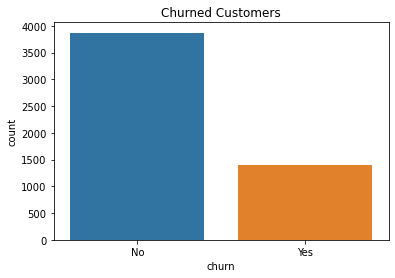

In [5]:
# get churn bar chart
e.get_bar_churn(train)

In [6]:
# get churn percentages
e.churn_percentages(train)

No     0.734117
Yes    0.265883
Name: churn, dtype: float64


* This data shows that about 26% of customers churn

## Statistical Questions Section

* All tests are chi-square tests to investigate variables 
* Alpha will be .05 for each test with a confidence interval of 95%
* All questions are comparing categorical variables to categorical variables

## Is there an association between churn and having phone service? 

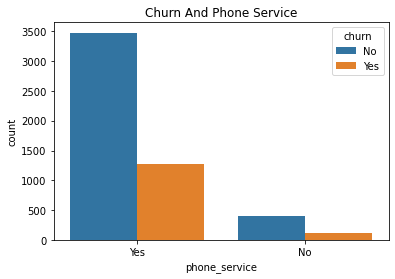

In [7]:
# generate count plot 
e.get_churn_and_phone(train)

* Customers with phone service do not appear to churn frequently. 


Hypothesis: 

**Ho: There is no association between Churn and Phone Service.**<br>
**Ha: There is an association between Churn and Phone Service.** 

In [8]:
# results of chi square test
e.get_phone_chi(train)

chi^2 = 1.9934
p     = 0.1579813801645912


* I do not have evidence to support an association between churn and phone service.
* The p-value is greater than alpha. 
* As a result this is a feature I will NOT use in my model.

## Is there an association between churn and having techinical support?

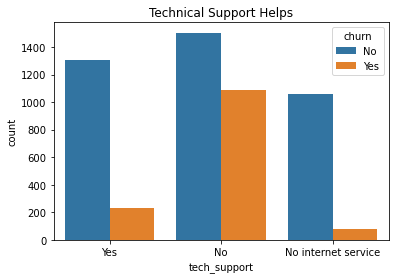

In [9]:
# display count plot 
e.get_tech_support_graph(train)

* The bar chart shows more than half of customers with  no tech support churn. 


In [10]:
# results of chi square test
e.get_tech_support_chi(train)

chi^2 = 647.6749
p     = 2.2865581269117635e-141


Hypothesis: 

**Ho: There is no association between Churn and Tech support.**<br>
**Ha: There is an association between Churn and Tech support.** 

* This test supports an association between tech support and churn. 
* I will use this feature in my model because of the results of my test. 
*  The p-value is less than the alpha. 


## Is there an association between churn and Internet Service Type?


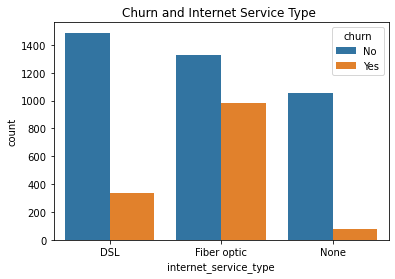

In [11]:
# generate count plot
e.get_internet_graph(train)

* Most customers who Churn have Fiber Optic Internet Service


In [12]:
# statistical test results
e.get_internet_type_chi(train)

chi^2 = 585.2706
p     = 8.130192076012108e-128


Hypothesis: 

**Ho: There is no association between Churn and Internet Service Type.**<br>
**Ha: There is an association between Churn and Internet Service Type.** 

* The test results support an association between the two variables
* I will use this feature in my model because of the support for this assocition.

## Is there an association between churn and  Fiber Optic Internet?

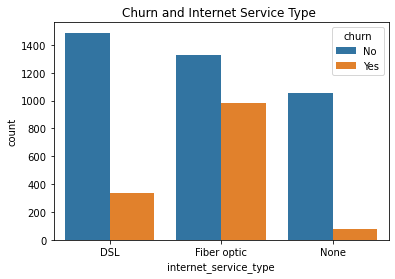

In [13]:
# generate count plot
e.get_internet_graph(train)

* There are a large amount of Fiber Optic customers who churn and this is worth investigating

In [14]:
# statistical test results
e.get_fiber_chi(train)

chi^2 = 537.4962
p     = 6.608799714670794e-119


Hypothesis: 

**Ho: There is no association between Churn and Fiber Optic Internet.**<br>
**Ha: There is an association between Churn and Fiber Optic Internet.** 

* The test supports an association between the two variables
* I will use this feature in my model because of the support for this assocition.

## Is there an association between churn and contract type?

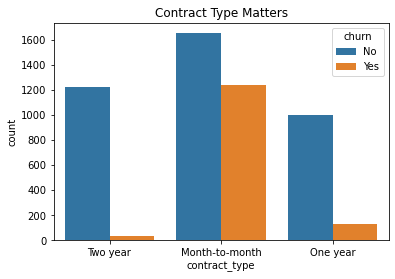

In [15]:
# generate count plot
e.get_contract_graph(train)

* More than 50% of customers on month to month contracts churn

In [16]:
# statistical test results
e.get_contract_chi(train)

chi^2 = 585.2706
p     = 8.130192076012108e-128


Hypothesis: 

**Ho: There is no association between Churn and Contract Type.**<br>
**Ha: There is an association between Churn and Contract Type.** 

* There is support for an association between the two variables
* The p value is less than alpha and provides evidence to 
* This feature will be used for my model because of this support of an association between these two variables.

## Exploration Summary

* Approximately 26% of customers churn.
* The features used for modeling will be Tech Support, Fiber Optic Internet, Internet Service Type and Contract Type
* The chi square tests provide support between Churn and Tech Support, Fiber Optic Internet,Internet Service Type as well as Contract Type
* More than 50% of customers on month to month contracts churn
* Most customers who Churn have Fiber Optic internet service
* More than half of customers with  no tech support churn
* There was no evidence to support an association between Churn and Phone Service so this feature will not be used for modeling


## Features included in Models

* The features for my models are Tech Support, Fiber Optic Internet, Internet Service Type and Contract Type
* These features showed an association with churn after completing my statistical tests




## Features NOT included in Model

* Phone service will not be included in my Model
* There was not an association between Phone Service and Churn based on the statistical test.

## Modeling

### Introduction

* I will use accuracy as my evaluation metric because I do not have a monetary value to associate with the churn of a customer
* ~ 73% of customers don't churn 
* My baseline model assumes every customer does not churn and this results in an accuracy of 73%
* Models will be evaluated on train and validate data sets 
* The model that performs the best will be evaluated on the test data

In [17]:
# establish baseline model
m.baseline(train)

Baseline accuracy: 0.73


## Best Models

In [18]:
# prepare data for models
X_train, X_validate, y_train, y_validate, X_test, y_test = m.model_columns(train,validate,test)

### Decision Tree  - Model 1

In [19]:
# test model on train and validate data 
m.decision_tree_model(X_train, X_validate, y_train, y_validate)

Accuracy of Decision Tree classifier on training set: 0.77
Accuracy of Decision Tree classifier on validate set: 0.74


* Decision Tree accuracy is 4% better than the baseline on training data
* Decision Tree accuracy is 1% better than the baseline on the validate data 

### Random Forrest - Model 2

In [20]:
# test model on train and validate data 
m.random_forrest_model(X_train, X_validate, y_train, y_validate)

Accuracy of Random Forrest classifier on training set: 0.78
Accuracy of Random Forrest classifier on validate set: 0.76


* Random Forrest accuracy is 5% better than the baseline on the training set
* Random Forrest accuracy is 3% better than the baseline on the validate set

### Knn - Model 3 

In [21]:
# test model on train data
m.knn_model(X_train, y_train)

Accuracy of KNN classifier on training set: 0.73


* Knn model is the same as the baseline and was not tested on the validate data

### Logistic Regression - Model 4

In [22]:
# test model on train and validate data 
m.logistic_regression_model(X_train, X_validate, y_train, y_validate)

Accuracy of Logistic Regression classifier on training set: 0.78
Accuracy of Logistic Regression classifier on validate set: 0.76


* Logistic Regression accuracy is 5% better than the baseline on the training set
* Logistic Regression accuracy is 3% better than the baseline on the validate set
* This is the model I will use on my test data.

## Test Model
* I will run my logistic regression model on my test data

In [23]:
# test best model on test data
m.test_model(X_test, y_test)

Accuracy of Logistic Regression classifier on test set: 0.77


### Modeling Wrap 

* I would recommend this model for production because it does not over fit the data and it performs 4% better than the baseline

## Conclusion

### Summary
* 26% of customers churn 
* Statistical evidence supports an association between churn and tech support, internet service, fiber optic internet and contract type respectively 
* The drivers I used were supported by statistical tests and I believe this is why my final model was able to perform above the baseline
* There is not an association between phone service and churn 


### Modeling Summary 
* The final model performed 4% better than the baseline
* I would recommend this model for production because it does not over fit the data and and performed better than baseline


### Recommendations
* Gather qualitative and quantitative data from customer's about the performance of the fiber optic internet 
* Solicit for quantitative and qualitative data on why customer's select month to month contracts 
* Review incentives offered for each contract type. 

### Next Steps
* I would like to use the financial data to determine the mean value of churn per customer
* Look for more drivers to develop a better performing model 